In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [2]:
auto_data = pd.read_csv('auto-mpg.csv')
auto_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
auto_data.drop(['car name', 'origin'], axis=1, inplace=True)

In [4]:
auto_data.dtypes

mpg     float64
cyl       int64
disp    float64
hp       object
wt        int64
acc     float64
yr        int64
dtype: object

In [5]:
hpIsDigit = pd.DataFrame(auto_data.hp.str.isdigit())
auto_data[hpIsDigit.hp == False]

,mpg,cyl,disp,hp,wt,acc,yr
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [6]:
auto_data = auto_data.replace('?', np.nan)
auto_data = auto_data.apply(lambda x: x.fillna(x.median()))
auto_data.hp = auto_data.hp.astype('float64')

In [7]:
X = auto_data.drop('mpg', axis=1)
y = auto_data['mpg']

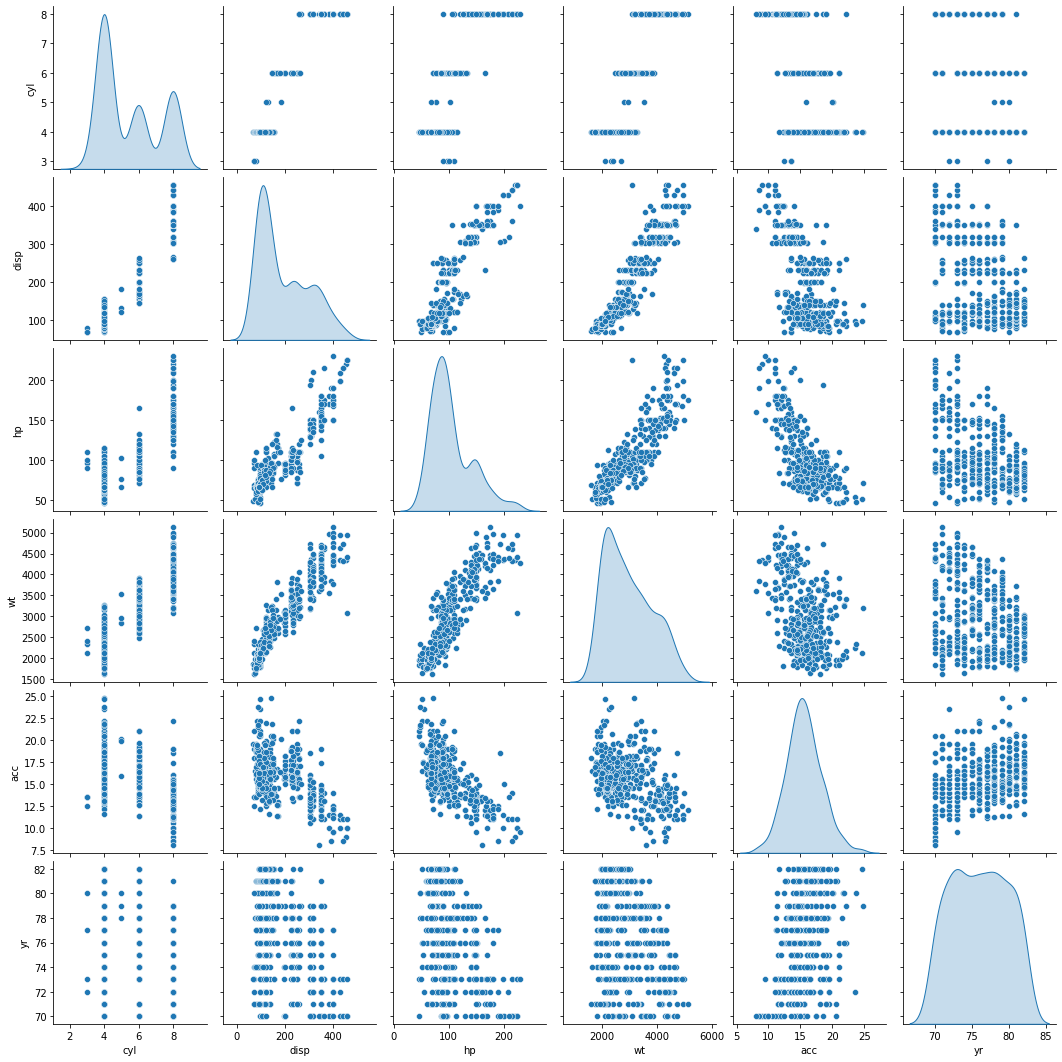

In [8]:
sns.pairplot(X, diag_kind='kde')

In [9]:
# 1. Scale the data
scaler = StandardScaler()
X_scaled_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled_df.head()

,cyl,disp,hp,wt,acc,yr
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [10]:
# 2. Find the co variance matrix
cov_matrix = np.cov(X_scaled_df, rowvar=False)
print(cov_matrix)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


In [11]:
pca = PCA(n_components=6)
pca.fit(X_scaled_df)

PCA(n_components=6)

In [12]:
pca.explained_variance_

array([4.26378678, 0.84068225, 0.67499578, 0.13552589, 0.06386533,
       0.03625731])

In [13]:
print(pca.components_)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]
 [-0.65709523 -0.18742114  0.62819714  0.33868744  0.15214558  0.02469974]
 [ 0.28804531 -0.00141408  0.60418441 -0.68887559  0.27061128  0.06487726]
 [-0.46420823  0.83717483 -0.10059817 -0.26829299  0.0367486   0.01405118]]


In [14]:
pca.explained_variance_ratio_

array([0.70884563, 0.13976166, 0.11221664, 0.0225309 , 0.01061748,
       0.0060277 ])

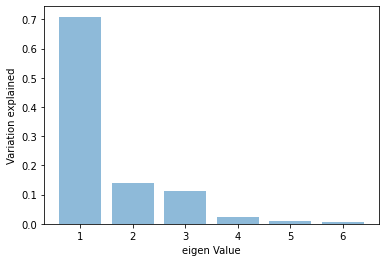

In [15]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

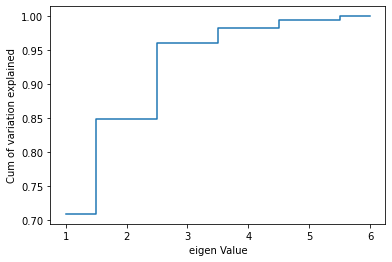

In [16]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [17]:
pca3 = PCA(n_components=3)
X_scaled_3 = pca3.fit_transform(X_scaled_df)
X_scaled_3


array([[ 2.58470158, -1.13503558, -0.09158558],
       [ 3.36172518, -1.03670689, -0.24694524],
       [ 2.95892839, -1.20779415, -0.47937758],
       ...,
       [-1.16393463,  0.71574676, -2.16248162],
       [-1.94324569,  1.32567228,  0.14526268],
       [-1.95553788,  1.41517409,  0.41668135]])

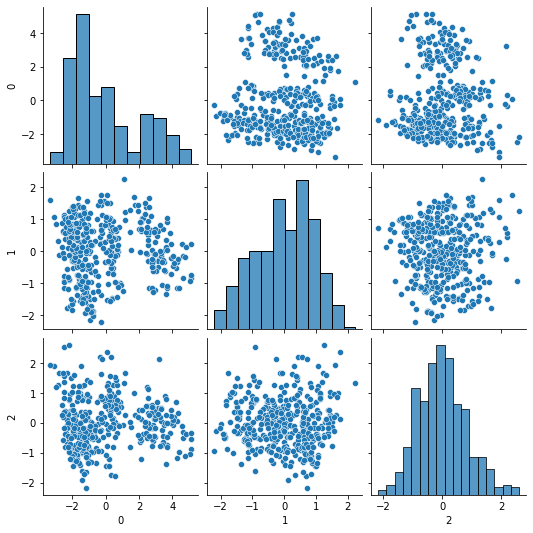

In [18]:
sns.pairplot(pd.DataFrame(X_scaled_3))

## Fit the model

In [19]:
regression_model = LinearRegression()
regression_model.fit(X_scaled_df, y)
regression_model.score(X_scaled_df, y)

0.8087079552406331

In [20]:
regression_model = LinearRegression()
regression_model.fit(X_scaled_3, y)
regression_model.score(X_scaled_3, y)

0.7799909620572006